# Lecture 5: Advanced Pandas

[Data Visualization · 1-DAV-105](https://bbrejova.github.io/viz/)

Lecture by Broňa Brejová

In this lecture we cover some more advanced parts of Pandas which are often used in data processing.

As usual, we start by importing libraries. We also import the country data set from World Bank https://databank.worldbank.org/home under CC BY 4.0 license (see Lecture 03).


In [60]:
import numpy as np
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [61]:
url = 'https://bbrejova.github.io/viz/data/World_bank.csv'
countries = pd.read_csv(url).set_index('Country')

## Hierarchical index (MultiIndex)


### A small example table

To illustrate a hierarchical index, we first create a very small table consisting of two countries and their population in two years, and convert this table from wide to long format.

In [62]:
example_countries = countries.loc[["Slovak Republic", "Austria"], 
                                  ["Population2010", "Population2020"]]
display(Markdown("**A small subset of countries table:**"), example_countries)
# change to long format
example_long = (example_countries.reset_index()
                                 .melt(id_vars=['Country'], 
                                       var_name='Year', 
                                       value_name='Population'))
# change year from string such as "Population2010" to int 2010
example_long.Year = example_long.Year.apply(lambda x : int(x[-4:]))
display(Markdown("**Changed to long format:**"), example_long)

**A small subset of countries table:**

,Population2010,Population2020
Country,,
Slovak Republic,"5,391,428.00","5,458,827.00"
Austria,"8,363,404.00","8,916,864.00"


**Changed to long format:**

,Country,Year,Population
0,Slovak Republic,2010,"5,391,428.00"
1,Austria,2010,"8,363,404.00"
2,Slovak Republic,2020,"5,458,827.00"
3,Austria,2020,"8,916,864.00"


### An index with duplicate labels

The original wide table had country as index, but in the long table, each country can have multiple rows. Pandas still allows us to use country as index with [duplicate values](https://pandas.pydata.org/docs/user_guide/duplicates.html). Selecting the name of the country then gives us multiple rows.

In [63]:
# set country name as index in a copy of the table
example_long_indexed = example_long.set_index('Country')
# display table with index
display(Markdown("**Table with country as index:**"), example_long_indexed)
# select Slovakia from this table
display(Markdown("**Selecting multiple rows using `example_long_indexed.loc['Slovak Republic']`:**"))
display(example_long_indexed.loc['Slovak Republic'])

**Table with country as index:**

,Year,Population
Country,,
Slovak Republic,2010,"5,391,428.00"
Austria,2010,"8,363,404.00"
Slovak Republic,2020,"5,458,827.00"
Austria,2020,"8,916,864.00"


**Selecting multiple rows using `example_long_indexed.loc['Slovak Republic']`:**

,Year,Population
Country,,
Slovak Republic,2010,"5,391,428.00"
Slovak Republic,2020,"5,458,827.00"


### Finally the hierarchical index

Our table can be more naturally indexed by a pair (country, year), which uniquely specifies a row. An index consisting of two or more levels is called [hierarchical or multi-level](https://pandas.pydata.org/docs/user_guide/advanced.html). 

* MultiIndex can be created by `set_index` with a list of columns to use as index.
* For faster operations, it is a good idea to sort the table by the index using [`sort_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html).
* In `loc` use a tuple with one value per level, or only several initial levels.
* To specify other levels, use [`xs`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html).

In [64]:
# create MultiIndex by choosing a list of columns
example_multiindexed = example_long.set_index(['Country', 'Year']).sort_index()
display(Markdown("**Table with a multiindex:**"), example_multiindexed)

**Table with a multiindex:**

Population
Country         Year             
Austria         2010 8,363,404.00
                2020 8,916,864.00
Slovak Republic 2010 5,391,428.00
                2020 5,458,827.00

In [65]:
display(Markdown("**Selecting a row by using a tuple in `loc`:**"))
display(example_multiindexed.loc[('Slovak Republic', 2010)])

**Selecting a row by using a tuple in `loc`:**

Population   5,391,428.00
Name: (Slovak Republic, 2010), dtype: float64

In [66]:
display(Markdown("**Selecting all rows for a country using a shorter tuple in `loc`:**"))
display(example_multiindexed.loc[('Slovak Republic',)])

**Selecting all rows for a country using a shorter tuple in `loc`:**

,Population
Year,
2010,"5,391,428.00"
2020,"5,458,827.00"


In [67]:
display(Markdown("**Selecting all rows for a year using `xs`:**"))
display(example_multiindexed.xs(2010, level='Year'))

**Selecting all rows for a year using `xs`:**

,Population
Country,
Austria,"8,363,404.00"
Slovak Republic,"5,391,428.00"


In [68]:
display(Markdown("**Names of index levels can be used in `query`:**"))
display(example_multiindexed.query('Year > 2015'))

**Names of index levels can be used in `query`:**

,,Population
Country,Year,
Austria,2020,"8,916,864.00"
Slovak Republic,2020,"5,458,827.00"


## Combining tables

### Concatenating tables using `concat`

* Function [`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) can be used to concatenate several tables. 
* At the default settings, it combines along axis 0, meaning that the rows of second table are added after the rows of the first table. 
* We will also use it for `axis=1`, in which case it finds rows with the same index in both tables and combines their columns.
* By default, the result has union of rows of the two tables, but intersection can be obtained by `join='inner'`. 

#### Example

Create a second small table of countries and display both tables. Then illustrate various concatenation modes using these tables.

In [69]:
example_countries2 = countries.loc[["Slovak Republic", "Austria", "Hungary"], 
                                   ["Area", "Region"]]
display(Markdown("**The first small table:**"), example_countries)
display(Markdown("**The second small table:**"), example_countries2)

**The first small table:**

,Population2010,Population2020
Country,,
Slovak Republic,"5,391,428.00","5,458,827.00"
Austria,"8,363,404.00","8,916,864.00"


**The second small table:**

,Area,Region
Country,,
Slovak Republic,"49,030.00",Europe & Central Asia
Austria,"83,879.00",Europe & Central Asia
Hungary,"93,030.00",Europe & Central Asia


In [70]:
display(Markdown("**Tables concatenated along axis 0:**"))
display(pd.concat([example_countries, example_countries2]))

**Tables concatenated along axis 0:**

,Population2010,Population2020,Area,Region
Country,,,,
Slovak Republic,"5,391,428.00","5,458,827.00",NaN,NaN
Austria,"8,363,404.00","8,916,864.00",NaN,NaN
Slovak Republic,NaN,NaN,"49,030.00",Europe & Central Asia
Austria,NaN,NaN,"83,879.00",Europe & Central Asia
Hungary,NaN,NaN,"93,030.00",Europe & Central Asia


In [71]:
display(Markdown("**Tables concatenated along axis 1:**"))
display(pd.concat([example_countries, example_countries2], axis=1))

**Tables concatenated along axis 1:**

,Population2010,Population2020,Area,Region
Country,,,,
Slovak Republic,"5,391,428.00","5,458,827.00","49,030.00",Europe & Central Asia
Austria,"8,363,404.00","8,916,864.00","83,879.00",Europe & Central Asia
Hungary,NaN,NaN,"93,030.00",Europe & Central Asia


In [72]:
display(Markdown("**Tables concatenated along axis 1 with inner join:**"))
display(pd.concat([example_countries, example_countries2], axis=1, join='inner'))

**Tables concatenated along axis 1 with inner join:**

,Population2010,Population2020,Area,Region
Country,,,,
Slovak Republic,"5,391,428.00","5,458,827.00","49,030.00",Europe & Central Asia
Austria,"8,363,404.00","8,916,864.00","83,879.00",Europe & Central Asia


### Merging tables with `merge`

* Function [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) works similarly as `concat` with `axis=1`, but it will match lines of two tables using any specified columns, not necessarily index. 
* If values in these columns repeat, it combines all matching pairs of rows.
* Setting `how` in `merge` allows us to include rows that do not have a matching row in the other table. 


In [73]:
# a small example of how all combinations of matching rows are returned:
tab1 = pd.DataFrame({'name': ['a','a','a','b'], 'value': [1,2,3,4]})
tab2 = pd.DataFrame({'name': ['a','a','b'], 'value': [10,20,30]})
display(Markdown("**DataFrame `tab1`:**"))
display(tab1)
display(Markdown("**DataFrame `tab2`:**"))
display(tab2)
display(Markdown("**Result of `pd.merge(tab1, tab2, on='name')`:**"))
display(pd.merge(tab1, tab2, on='name'))

**DataFrame `tab1`:**

,name,value
0,a,1
1,a,2
2,a,3
3,b,4


**DataFrame `tab2`:**

,name,value
0,a,10
1,a,20
2,b,30


**Result of `pd.merge(tab1, tab2, on='name')`:**

,name,value_x,value_y
0,a,1,10
1,a,1,20
2,a,2,10
3,a,2,20
4,a,3,10
5,a,3,20
6,b,4,30


#### Example of using `merge` on countries

* Countries belong to various international organizations and a single country can belong to many. We will represent this as a table having one row for each pair of country and an organization it belongs to.
* To combine this with other country data, we apply `merge` to get a table in which each country is copied for each organization it is in.
* Then we can for example compute the total number of people living in countries covered by individual organizations. 



In [74]:
# we create a small membership table by parsing a CSV-format string
import io
membership_str = io.StringIO("""Country,Member
Slovak Republic,NATO
Slovak Republic,EU
Slovak Republic,UN
Austria,UN
Austria,EU
""")
membership = pd.read_csv(membership_str)
display(Markdown("**A small country membership table:**"), membership)

**A small country membership table:**

,Country,Member
0,Slovak Republic,NATO
1,Slovak Republic,EU
2,Slovak Republic,UN
3,Austria,UN
4,Austria,EU


In [75]:
# merging tables using column Country in both
example_membership = pd.merge(example_countries, membership, on='Country')
display(Markdown("**Merged table:**"), example_membership)

**Merged table:**

,Country,Population2010,Population2020,Member
0,Slovak Republic,"5,391,428.00","5,458,827.00",NATO
1,Slovak Republic,"5,391,428.00","5,458,827.00",EU
2,Slovak Republic,"5,391,428.00","5,458,827.00",UN
3,Austria,"8,363,404.00","8,916,864.00",UN
4,Austria,"8,363,404.00","8,916,864.00",EU


In [76]:
# compute the total number of people in EU (here only for our two countries)
display(example_membership.query('Member == "EU"')['Population2020'].sum())

np.float64(14375691.0)

As we will see in the next section, we can also use `groupby` to compute sums for all organizations. 

In [77]:
display(Markdown("**The sum of country populations for each organization** (only for our two countries)"))
display(example_membership.groupby('Member')['Population2020'].sum())

**The sum of country populations for each organization** (only for our two countries)

Member
EU     14,375,691.00
NATO    5,458,827.00
UN     14,375,691.00
Name: Population2020, dtype: float64

Similar operations are often done in relational databases, where `merge` is called join. More in a specialized database course in the third year. Next we will cover `groupby` function, which is also frequently used in databases.

## Aggregation, split-apply-combine (`groupby`)

### A simple example of `groupby` command

In our big table of all countries, we have a column called `Region`. Let us say we want to compute the number of countries belonging to each region of the world. 

* First, `groupby` command splits countries into groups by `Region`.
* Then, `size` computes the size of each group (the number of rows).

In [78]:
display(Markdown("**The number of countries in each region:**"))
display(countries.groupby('Region').size())

**The number of countries in each region:**

Region
East Asia & Pacific           37
Europe & Central Asia         58
Latin America & Caribbean     42
Middle East & North Africa    21
North America                  3
South Asia                     8
Sub-Saharan Africa            48
dtype: int64

### General principles

Pandas follow the [split-apply-combine strategy](https://pandas.pydata.org/docs/user_guide/groupby.html) introduced in R by [Hadley Wickham](https://www.jstatsoft.org/article/view/v040i01/v40i01.pdf).

**Split**: split data into groups, often by values in some column, such as `Region` in the `countries` table.

**Apply**: apply some computation on each group, obtaining some result (single value, Series, DataFrame).

**Combine**: concatenate results for all groups together to a new table.


**Typical operations in the apply step:**

* **aggregation**: e.g. compute group size, mean, median etc.
* **transformation**: e.g. compute percentage or rank of each item within a group
* **filtering**: e.g. include only groups that are large enough 

In Pandas, this is done by combination of [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby) for the split step and additional functions for the apply step. The combine step is done implicitly. Pandas library provides many options, we will cover only basics.

### Simple aggregation in the apply step

Apply functions such as `sum`, `mean`, `median`, `min`, `max`, `size`, `count`, `describe` after `groupby`.

* `size` gives the number of rows in the group (see example above).
* `count` gives the number of non-missing values in each column.

In [20]:
display(Markdown("**Sums of country indicators in each region**"))
display(Markdown(" (including nonsense sums such as life expectation or GDP per capita)"))
display(countries.groupby('Region').sum(numeric_only=True))

**Sums of country indicators in each region**

 (including nonsense sums such as life expectation or GDP per capita)

,Population2000,Population2010,Population2020,Area,GDP2000,GDP2010,GDP2020,Expectancy2000,Expectancy2010,Expectancy2020,Fertility2000,Fertility2010,Fertility2020
Region,,,,,,,,,,,,,
East Asia & Pacific,"2,025,976,167.00","2,187,065,378.00","2,340,350,517.00","24,794,669.42","233,980.83","506,478.43","569,610.58","2,436.61","2,454.65","2,520.88",103.92,91.58,80.30
Europe & Central Asia,"862,786,208.00","889,169,626.00","922,353,365.00","28,813,751.77","883,386.74","1,752,994.15","1,966,242.67","4,053.36","4,204.81","4,255.06",94.74,100.09,93.30
Latin America & Caribbean,"521,281,151.00","588,873,865.00","650,534,988.00","20,523,017.36","194,902.34","462,544.16","522,816.20","2,931.71","3,013.73","2,957.72",108.07,90.74,76.61
Middle East & North Africa,"321,037,455.00","397,997,552.00","479,966,650.00","11,385,553.90","172,013.59","327,153.10","293,809.50","1,496.97","1,557.33","1,568.09",71.54,59.86,52.64
North America,"312,909,973.00","343,397,156.00","369,582,572.00","19,715,550.00","116,885.13","198,088.01","214,882.96",234.66,240.36,239.79,5.31,5.28,4.45
South Asia,"1,406,945,496.00","1,660,546,144.00","1,882,531,621.00","5,135,270.00","5,525.87","16,479.92","21,370.63",511.70,546.95,568.09,31.62,24.66,19.56
Sub-Saharan Africa,"671,212,484.00","879,797,424.00","1,151,302,077.00","24,328,265.87","43,582.79","108,587.66","96,165.83","2,547.64","2,803.97","3,003.10",262.34,237.78,205.94


In [21]:
display(Markdown("**Specifically sum only population in 2020 per region:**"))
display(countries.groupby('Region')['Population2020'].sum())

**Specifically sum only population in 2020 per region:**

Region
East Asia & Pacific          2,340,350,517.00
Europe & Central Asia          922,353,365.00
Latin America & Caribbean      650,534,988.00
Middle East & North Africa     479,966,650.00
North America                  369,582,572.00
South Asia                   1,882,531,621.00
Sub-Saharan Africa           1,151,302,077.00
Name: Population2020, dtype: float64

### Transformation in the apply step

Here we use [`transform`](https://pandas.pydata.org/docs/user_guide/groupby.html#the-transform-method) method which gets a function which is used on every group and should produce a group with the same index. We could write our own function (e.g. a lambda expression) or we can use one the built-in functions specified by a string. 

Here we compute for each country what percentage is its population from the population of the region.

In [22]:
# group countries by region, compute the sum of each region 
# and copy the regional sum for each country
region_sums = countries.groupby('Region')['Population2020'].transform('sum')
display(Markdown("**For each country, what is the total population of its region:**"))
display(region_sums)
# now divide the population of the country by the regional total
pop_within_group = countries['Population2020'] / region_sums
display(Markdown("**For each country, what fraction is its population within region:**"))
display(pop_within_group.head())

**For each country, what is the total population of its region:**

Country
Afghanistan          1,882,531,621.00
Albania                922,353,365.00
Algeria                479,966,650.00
American Samoa       2,340,350,517.00
Andorra                922,353,365.00
                           ...       
Virgin Islands         650,534,988.00
West Bank and Gaza     479,966,650.00
Yemen                  479,966,650.00
Zambia               1,151,302,077.00
Zimbabwe             1,151,302,077.00
Name: Population2020, Length: 217, dtype: float64

**For each country, what fraction is its population within region:**

Country
Afghanistan      0.02
Albania          0.00
Algeria          0.09
American Samoa   0.00
Andorra          0.00
Name: Population2020, dtype: float64

Bellow we see an alternative form of the same computation when transformation is done via a lambda function that takes a list `x` of country sizes within a region and divides them by the sum of `x`. 

The use of lambda functions applied on each element is often convenient but might be slow on large data.


In [23]:
pop_within_group = (countries.groupby('Region')['Population2020']
                    .transform(lambda x : x / x.sum()))
display(Markdown("**For each country, what fraction is its population within region:**"))
display(pop_within_group.head())

**For each country, what fraction is its population within region:**

Country
Afghanistan      0.02
Albania          0.00
Algeria          0.09
American Samoa   0.00
Andorra          0.00
Name: Population2020, dtype: float64

Lambda expression `lambda x : x / x.sum()` above is a shorthand for defining a function which gets `x` and returns `x / x.sum()`. Below we show a version with function explictly defined.

In [24]:
def group_fraction(x):
    return x / x.sum()
pop_within_group = (countries.groupby('Region')['Population2020']
                    .transform(group_fraction))
display(Markdown("**For each country, what fraction is its population within region:**"))
display(pop_within_group.head())

**For each country, what fraction is its population within region:**

Country
Afghanistan      0.02
Albania          0.00
Algeria          0.09
American Samoa   0.00
Andorra          0.00
Name: Population2020, dtype: float64

In [25]:
display(Markdown("**Add back region name using concat:**"))
pop_within_group2 = pd.concat([pop_within_group, countries['Region']], axis=1)
display(pop_within_group2.head())

display(Markdown("**Look up value for Slovakia:**"))
display(pop_within_group2.loc["Slovak Republic"])

**Add back region name using concat:**

,Population2020,Region
Country,,
Afghanistan,0.02,South Asia
Albania,0.00,Europe & Central Asia
Algeria,0.09,Middle East & North Africa
American Samoa,0.00,East Asia & Pacific
Andorra,0.00,Europe & Central Asia


**Look up value for Slovakia:**

Population2020                     0.01
Region            Europe & Central Asia
Name: Slovak Republic, dtype: object

In [26]:
display(Markdown("**Check that the sum of each region is 1:**"))
display(pop_within_group2.groupby('Region').sum())

**Check that the sum of each region is 1:**

,Population2020
Region,
East Asia & Pacific,1.00
Europe & Central Asia,1.00
Latin America & Caribbean,1.00
Middle East & North Africa,1.00
North America,1.00
South Asia,1.00
Sub-Saharan Africa,1.00


### Filtering in the apply step

Finally, `groupby` can be followed by [`filter`](https://pandas.pydata.org/docs/user_guide/groupby.html#filtration) to use only some of the groups in the result.

Here we report all countries in regions that have at least one billion inhabitants.

In [27]:
# filter gets a function returning a boolean value for each group
filtered = (countries.groupby("Region")
            .filter(lambda x : x['Population2020'].sum() > 1e9))
display(Markdown("**Filtered data:**"))
display(filtered.head())
display(Markdown("**Check sums in regions for selected countries:**"))
display(filtered.groupby('Region')['Population2020'].sum())

**Filtered data:**

,ISO3,Region,Income Group,Population2000,Population2010,Population2020,Area,GDP2000,GDP2010,GDP2020,Expectancy2000,Expectancy2010,Expectancy2020,Fertility2000,Fertility2010,Fertility2020
Country,,,,,,,,,,,,,,,,
Afghanistan,AFG,South Asia,Low income,"19,542,983.00","28,189,672.00","38,972,231.00","652,860.00",NaN,562.50,512.06,55.30,60.85,62.58,7.53,6.10,4.75
American Samoa,ASM,East Asia & Pacific,High income,"58,229.00","54,849.00","46,189.00",200.00,NaN,"10,446.86","15,609.78",NaN,NaN,NaN,NaN,NaN,NaN
Angola,AGO,Sub-Saharan Africa,Lower middle income,"16,394,062.00","23,364,186.00","33,428,486.00","1,246,700.00",556.88,"3,586.66","1,450.91",46.02,56.73,62.26,6.64,6.19,5.37
Australia,AUS,East Asia & Pacific,High income,"19,028,802.00","22,031,750.00","25,649,247.00","7,741,220.00","21,870.42","52,147.02","51,868.25",79.23,81.70,83.20,1.76,1.93,1.58
Bangladesh,BGD,South Asia,Lower middle income,"129,193,327.00","148,391,139.00","167,420,950.00","147,570.00",413.10,776.86,"2,233.31",65.78,68.64,71.97,3.22,2.34,2.00


**Check sums in regions for selected countries:**

Region
East Asia & Pacific   2,340,350,517.00
South Asia            1,882,531,621.00
Sub-Saharan Africa    1,151,302,077.00
Name: Population2020, dtype: float64

### Grouping by multiple values

Function `groupby` can get a single column, but also a list of columns or a Series which will be used as if it was a column of the table. 

In [28]:
display(Markdown("**Populations split by both region and income group**"))
display(countries.groupby(['Region', "Income Group"])['Population2020'].sum())

**Populations split by both region and income group**

Region                      Income Group       
East Asia & Pacific         High income             223,971,823.00
                            Low income               25,867,467.00
                            Lower middle income     301,779,468.00
                            Upper middle income   1,788,731,759.00
Europe & Central Asia       High income             522,292,344.00
                            Lower middle income      94,487,207.00
                            Upper middle income     305,573,814.00
Latin America & Caribbean   High income              34,033,357.00
                            Lower middle income      40,120,621.00
                            Upper middle income     547,890,556.00
Middle East & North Africa  High income              68,156,525.00
                            Low income               53,056,642.00
                            Lower middle income     304,739,289.00
                            Upper middle income      54,014,194.00
North America 

* Now we create a Series classifying each country as small, medium and large using cutoff 1 million for small and 100 million for medium. 
* We then use this Series in `groupby`.
* The classification is created by [`pd.cut`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) function.


In [29]:
bin_ends = [0, 1e6, 1e8, 1e10]
bin_labels = ["small", "medium", "large"]
size_groups = pd.cut(countries['Population2020'],
                     bins=bin_ends, labels=bin_labels).rename("SizeCategory")
display(Markdown("**Country size classification:**"))
display(size_groups.head())

**Country size classification:**

Country
Afghanistan       medium
Albania           medium
Algeria           medium
American Samoa     small
Andorra            small
Name: SizeCategory, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

Now we can use `size_groups` Series in `groupby`. 

Parameter [`observed=True`](https://pandas.pydata.org/docs/user_guide/groupby.html#handling-of-un-observed-categorical-values) is related to the fact that `size_groups` is has a categorial variable type to be explained next.

In [30]:
# now use size_groups in groupby
display(Markdown("**The number of countries in each size group:**"))
display(countries.groupby(size_groups, observed=True).size())
display(Markdown("**The number of countries in each size group and region:**"))
display(countries.groupby(['Region', size_groups], observed=True).size())

**The number of countries in each size group:**

SizeCategory
small      57
medium    146
large      14
dtype: int64

**The number of countries in each size group and region:**

Region                      SizeCategory
East Asia & Pacific         small           18
                            medium          15
                            large            4
Europe & Central Asia       small           12
                            medium          45
                            large            1
Latin America & Caribbean   small           19
                            medium          21
                            large            2
Middle East & North Africa  small            1
                            medium          19
                            large            1
North America               small            1
                            medium           1
                            large            1
South Asia                  small            2
                            medium           3
                            large            3
Sub-Saharan Africa          small            4
                            medium          42
                   

## Categorical variables

Categorical variables have values from a small set, such as region and income group in the table of countries. So far we have represented them only as strings, but we can explicitly convert them to a [categorical data type](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) in Pandas. 

This has several advantages:
* Strings are internally replaced by numerical IDs within the table, potentially saving memory.
* Categories can be ordered and then sorting, minimum, maximum etc works as desired, not alphabetically.
* Pandas is aware of the full set of possible values. For example categories without members can appear in the `groupby` results.

#### Example
Income groups in our table are strings, we will convert them to an ordered categorical variable.

In [31]:
# creating a categorical type
cat_type = pd.api.types.CategoricalDtype(categories=["Low income", 
                                                     "Lower middle income", 
                                                     "Upper middle income", 
                                                     "High income"], 
                                         ordered=True)
# converting Income Group column to cat_type in a new DataFrame
countries_cat = countries.astype({'Income Group': cat_type})

display(Markdown("**Income Group column in the old table:**"), 
        countries['Income Group'].head(3))
display(Markdown("**Income Group column in the new table:**"), 
        countries_cat['Income Group'].head(3))


**Income Group column in the old table:**

Country
Afghanistan             Low income
Albania        Upper middle income
Algeria        Lower middle income
Name: Income Group, dtype: object

**Income Group column in the new table:**

Country
Afghanistan             Low income
Albania        Upper middle income
Algeria        Lower middle income
Name: Income Group, dtype: category
Categories (4, object): ['Low income' < 'Lower middle income' < 'Upper middle income' < 'High income']

In [32]:
display(Markdown("**Minimum and maximum income group in the table with categorical values:**"
                 "  (manually fixed order):"))
display(countries_cat['Income Group'].min())
display(countries_cat['Income Group'].max())

display(Markdown("**Minimum and maximum income group in the table with strings**"
                 "  (alphabetical order):"))
display(countries['Income Group'].dropna().min())
display(countries['Income Group'].dropna().max())


**Minimum and maximum income group in the table with categorical values:**  (manually fixed order):

'Low income'

'High income'

**Minimum and maximum income group in the table with strings**  (alphabetical order):

'High income'

'Upper middle income'

* Note that if categories do not need a fixed order, they can be created automatically by the `astype` function as in the code below. 
* Notice that `groupby` creates even empty groups which would not happen with strings. This is caused by `observed=False` setting.

In [33]:
# convert region to an unordered category
countries_cat2 = countries_cat.astype({'Region': 'category'})
# count the number of countries for each combination of income group and region
countries_cat2.groupby(['Income Group', 'Region'], observed=False).size()

Income Group         Region                    
Low income           East Asia & Pacific            1
                     Europe & Central Asia          0
                     Latin America & Caribbean      0
                     Middle East & North Africa     2
                     North America                  0
                     South Asia                     1
                     Sub-Saharan Africa            22
Lower middle income  East Asia & Pacific           13
                     Europe & Central Asia          4
                     Latin America & Caribbean      4
                     Middle East & North Africa     8
                     North America                  0
                     South Asia                     6
                     Sub-Saharan Africa            19
Upper middle income  East Asia & Pacific            9
                     Europe & Central Asia         16
                     Latin America & Caribbean     19
                     Middle East &

## Dates and times

An important type of data sets are time series, where some variables are measured repeatedly over time. Pandas has an extensive support [for work with times and dates](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). Here we show only a small example.

* We illustrate this on the movie dataset from  [Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset) (see lecture 04). 
* The column labeled `release_date` is recognized as date by passing `parse_dates` parameter to `read_csv`.
* Then we call function [`day_name()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.day_name.html) to get the day of week for each release day and use [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) to see which days are most frequent as movie release dates. 
* We also use the release date as the  x-coordinate in a scatterplot. 

In [34]:
# import data, including parsing of dates
url = 'https://bbrejova.github.io/viz/data/Movies_small.csv'
movies = pd.read_csv(url, parse_dates=['release_date'])
# get days of week for realse dates
days = movies['release_date'].apply(lambda x : x.day_name())
days.value_counts()

release_date
Friday       639
Thursday     515
Wednesday    474
Tuesday      175
Saturday      94
Monday        87
Sunday        65
Name: count, dtype: int64

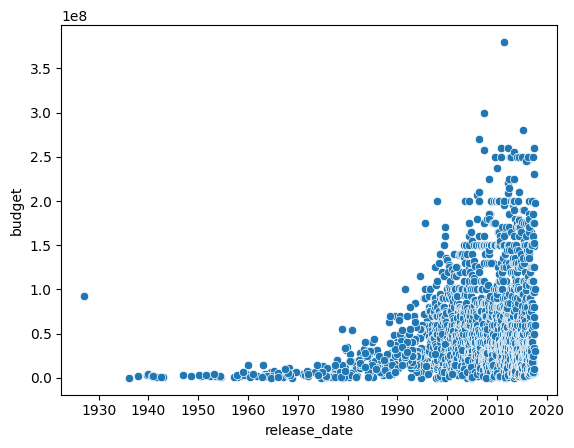

In [35]:
# use release date is x-coordinate
sns.scatterplot(data=movies, x='release_date', y='budget')
pass

## Missing values

Data sets are often incomplete, and Pandas provides techniques for [working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

* Missing data are typically imported as `np.nan` (not-a-number).
* These cannot occur in int-type columns, so ints are converted to floats, but can be handled in a [special way](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html).

Bellow we show a small example what happens when working with missing data, including functions [`isna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isna.html), [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html), [`fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html).


In [ ]:
# create a small Series with one missing value
a = pd.Series([1, 2, np.nan, 3])
display(Markdown("**`a.sum()` skips missing values:**"), 
        a.sum())
display(Markdown("**`a.count()` counts non-missing values:**"), 
        a.count())
display(Markdown("**`a.mean()` also considers only non-missing:**"),
        a.mean())
display(Markdown("**`a > 2` evaluates missing values as `False`, similarly `<`, `==`:**"),
        a > 2)
display(Markdown("**`a == np.nan` also evaluates as `False`:**"),
        a == np.nan)
display(Markdown("**`a.isna()` can be used to detect missing values:**"),
        a.isna())
display(Markdown("**`a.dropna()` omits missing values:**"),
        a.dropna())
display(Markdown("**`a.fillna(-1)` replaces them with a specified value:**"),
        a.fillna(-1))

**`a.sum()` skips missing values:**

np.float64(6.0)

**`a.count()` counts non-missing values:**

np.int64(3)

**`a.mean()` also considers only non-missing:**

np.float64(2.0)

**`a > 2` evaluates missing values as `False`, similarly `<`, `==`:**

0    False
1    False
2    False
3     True
dtype: bool

**`a == np.nan` also evaluates as `False`:**

0    False
1    False
2    False
3    False
dtype: bool

**`a.isna()` can be used to detect missing values:**

0    False
1    False
2     True
3    False
dtype: bool

**`a.dropna()` omits missing values:**

0   1.00
1   2.00
3   3.00
dtype: float64

**`a.fillna(-1)` replaces them with a specified value:**

0    1.00
1    2.00
2   -1.00
3    3.00
dtype: float64

## Pandas efficiency

Below we show several examples how different ways of implementing the same operation can have very different running time on large data.  Pandas functions are usually much faster than manual iteration. However, if you do not work on huge data sets, the difference is not so important.

To measure time, we use a special Jupyter command [`%timeit`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). It runs the code several times to estimate the time per one repeat.

In [37]:
# generate a Series of million random numbers and also convert it to Python list
length = int(1e6)
xs = pd.Series(np.random.uniform(0,100, length))
xl = list(xs)

Below we see that method `sum()` on Series is faster than Python built-in `sum` on a Python list, but Python built-in `sum` on Series is much slower, because it iterates over elements of Series. 

In [38]:
display(Markdown("**Method `sum` on `Series` `xs.sum()`:**"))
%timeit result = xs.sum()
display(Markdown("**Python `sum` on Python list `sum(xl)`:**"))
%timeit result = sum(xl)
display(Markdown("**Python `sum` on Series `sum(xs)`:**"))
%timeit result = sum(xs)

**Method `sum` on `Series` `xs.sum()`:**

450 μs ± 22.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**Python `sum` on Python list `sum(xl)`:**

4.71 ms ± 64.3 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Python `sum` on Series `sum(xs)`:**

40.9 ms ± 874 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Below we compare three ways of generating a sequence of squared values. Multiplying Series with `*` is the fastest, Python list comprehension is much slower and `apply` function from Pandas is even slower.

In [39]:
display(Markdown("**Pandas `Series` multiplication `x2s = xs * xs`**:"))
%timeit x2s = xs * xs
display(Markdown("**Python list comprehension on a list `x2l = [x * x for x in xl]`:**"))
%timeit x2l = [x * x for x in xl]
display(Markdown("**Pandas `apply` function `x2s = xs.apply(lambda x : x * x)`**"))
%timeit x2s = xs.apply(lambda x : x * x)

**Pandas `Series` multiplication `x2s = xs * xs`**:

766 μs ± 102 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**Python list comprehension on a list `x2l = [x * x for x in xl]`:**

38.4 ms ± 3.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Pandas `apply` function `x2s = xs.apply(lambda x : x * x)`**

159 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The code below creates the Series of squares by creating a Series filled with zeroes and then assigning individual values using for-loop. This is again much slower than all methods above, so to make the code reasonably fast, we run it on data which is 100 times smaller than above. 

In [40]:
length2 = 10000
xs_small = xs.iloc[0:length2]
def assignments(len, x):
  x2 = pd.Series([0.0] * len)
  for i in range(len): 
    x2[i] = x[i] * x[i]
  return x2
%timeit x2s_small = assignments(length2, xs_small)


103 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Finally the code below is even worse. It appends individual squares to a Series which starts with size 1. We run it on even smaller list of size 1000.

In [41]:
length3 = 1000
xs_tiny = xs.iloc[0:length3]
def assignments(len, x):
  x2 = pd.Series([0.0])
  for i in range(len): 
    x2[i] = x[i] * x[i]
  return x2
%timeit x2s_tiny = assignments(length3, xs_tiny)

169 ms ± 4.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
